### correlation file info 
### [0] is an image object? 
### [1] is data table 
### with this header: 
"""
XTENSION= 'BINTABLE' / FITS Binary Table Extension                              
BITPIX  =                    8 / 8-bits character format                        
NAXIS   =                    2 / Tables are 2-D char. array                     
NAXIS1  =                   88 / Bytes in row                                   
NAXIS2  =                  428 / no comment                                     
PCOUNT  =                    0 / Parameter count always 0                       
GCOUNT  =                    1 / Group count always 1                           
TFIELDS =                   13 / No. of col in table                            
TFORM1  = '1D      ' / Format of field                                          
TTYPE1  = 'field_x ' / Field label                                              
TUNIT1  = 'pixels  ' / Physical unit of field                                   
TFORM2  = '1D      ' / Format of field                                          
TTYPE2  = 'field_y ' / Field label                                              
TUNIT2  = 'pixels  ' / Physical unit of field                                   
TFORM3  = '1D      ' / Format of field                                          
TTYPE3  = 'field_ra' / Field label                                              
TUNIT3  = 'degrees ' / Physical unit of field                                   
TFORM4  = '1D      ' / Format of field                                          
TTYPE4  = 'field_dec' / Field label                                             
TUNIT4  = 'degrees ' / Physical unit of field                                   
TFORM5  = '1D      ' / Format of field                                          
TTYPE5  = 'index_x ' / Field label                                              
TUNIT5  = 'pixels  ' / Physical unit of field                                   
TFORM6  = '1D      ' / Format of field                                          
TTYPE6  = 'index_y ' / Field label                                              
TUNIT6  = 'pixels  ' / Physical unit of field                                   
TFORM7  = '1D      ' / Format of field                                          
TTYPE7  = 'index_ra' / Field label                                              
TUNIT7  = 'degrees ' / Physical unit of field                                   
TFORM8  = '1D      ' / Format of field                                          
TTYPE8  = 'index_dec' / Field label                                             
TUNIT8  = 'degrees ' / Physical unit of field                                   
TFORM9  = '1J      ' / Format of field                                          
TTYPE9  = 'index_id' / Field label                                              
TUNIT9  = 'none    ' / Physical unit of field                                   
TFORM10 = '1J      ' / Format of field                                          
TTYPE10 = 'field_id' / Field label                                              
TUNIT10 = 'none    ' / Physical unit of field                                   
TFORM11 = '1D      ' / Format of field                                          
TTYPE11 = 'match_weight' / Field label                                          
TUNIT11 = 'none    ' / Physical unit of field                                   
TFORM12 = '1E      ' / Format of field                                          
TTYPE12 = 'FLUX    ' / Field label                                              
TFORM13 = '1E      ' / Format of field                                          
TTYPE13 = 'BACKGROUND' / Field label                                            
ORIGIN  = 'ESO-QFITS' / Written by QFITS                                        
DATE    = '2023-12-07T21:16:23' / [UTC] Date of writing  
"""

In [18]:
from astropy.io import fits
from astropy.nddata import NDData
from astropy.table import Table
from astropy.stats import sigma_clipped_stats
from photutils.psf import extract_stars, EPSFBuilder
import pandas as pd
import numpy as np
from compare_aspect.plots import centile_clip
import matplotlib.pyplot as plt 
import sys 
sys.path.append('/home/bekah/gPhoton2')
sys.path.append('/home/ubuntu/gPhoton2/gPhoton')
from gPhoton.pipeline import execute_pipeline

In [65]:
eclipse = 11604
new_corr = fits.open(f'/home/bekah/glcat/corr_new_{eclipse}.fits')
#old_corr = fits.open(f'/home/bekah/glcat/corr_old_{eclipse}.fits')
old_corr = fits.open("/home/bekah/Downloads/corr.fits")

new_df=pd.DataFrame(np.array(new_corr[1].data).byteswap().newbyteorder())
old_df=pd.DataFrame(np.array(old_corr[1].data).byteswap().newbyteorder())

merged_corr = pd.merge(old_df, new_df, how='inner', on='index_id', suffixes=('_old', '_new'))

# calculate diff between star and index location 
merged_corr['old_ra_quality'] = abs(merged_corr['field_ra_old']-merged_corr['index_ra_old'])
merged_corr['old_dec_quality'] = abs(merged_corr['field_dec_old']-merged_corr['index_dec_old'])
merged_corr['new_ra_quality'] = abs(merged_corr['field_ra_new']-merged_corr['index_ra_new'])
merged_corr['new_dec_quality'] = abs(merged_corr['field_dec_new']-merged_corr['index_dec_new'])

(array([402.,  18.,   5.,   4.,   2.,   4.,   1.,   1.,   2.,   3.]),
 array([3.47269378e-08, 2.08558662e-04, 4.17082597e-04, 6.25606532e-04,
        8.34130467e-04, 1.04265440e-03, 1.25117834e-03, 1.45970227e-03,
        1.66822621e-03, 1.87675014e-03, 2.08527408e-03]),
 <BarContainer object of 10 artists>)

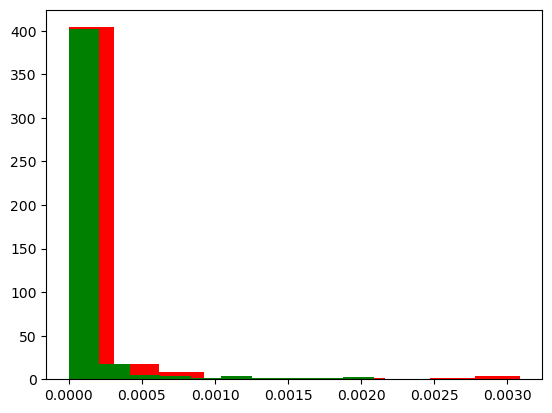

In [66]:
# plot absolute value of difference 
plt.hist(abs(merged_corr['new_ra_quality']), color='blue')
plt.hist(abs(merged_corr['old_ra_quality']), color='red')
plt.hist(abs(merged_corr['new_dec_quality']), color='orange')
plt.hist(abs(merged_corr['old_dec_quality']), color='green')

In [67]:
merged_corr[['new_ra_quality', 'old_ra_quality', 'new_dec_quality', 'old_dec_quality']].describe()

,new_ra_quality,old_ra_quality,new_dec_quality,old_dec_quality
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,1.622467e-04,1.622913e-04,1.173940e-04,1.173894e-04
std,3.644799e-04,3.644805e-04,2.668057e-04,2.668276e-04
min,5.365320e-07,5.301802e-07,1.274536e-09,3.472694e-08
25%,3.246943e-05,3.285521e-05,2.121505e-05,2.086690e-05
50%,7.023570e-05,7.009012e-05,4.931371e-05,4.909910e-05
75%,1.389991e-04,1.392122e-04,9.755459e-05,9.786499e-05
max,3.085562e-03,3.085459e-03,2.084773e-03,2.085274e-03


In [68]:
merged_corr

,field_x_old,field_y_old,field_ra_old,field_dec_old,index_x_old,index_y_old,index_ra_old,index_dec_old,index_id,field_id_old,...,index_ra_new,index_dec_new,field_id_new,match_weight_new,FLUX_new,BACKGROUND_new,old_ra_quality,old_dec_quality,new_ra_quality,new_dec_quality
0,2173.254395,1603.349365,292.133923,-41.583412,2171.874873,1602.703638,292.134690,-41.583683,5,0,...,292.134690,-41.583683,0,0.994893,5196.283203,3.201660,0.000767,0.000271,0.000767,0.000271
1,2149.511475,1148.649536,292.146229,-41.772898,2148.101094,1148.638560,292.147017,-41.772905,32,1,...,292.147017,-41.772905,1,0.995315,4685.598145,3.181641,0.000788,0.000007,0.000788,0.000007
2,1608.567505,526.511902,292.448412,-42.032547,1607.856731,526.948115,292.448811,-42.032365,204,2,...,292.448811,-42.032365,2,0.995545,2273.860352,3.149414,0.000399,0.000182,0.000399,0.000182
3,915.486511,1659.378662,292.834328,-41.559880,914.819095,1658.860112,292.834701,-41.560095,46,3,...,292.834701,-41.560095,3,0.996639,1965.178711,3.215332,0.000373,0.000215,0.000373,0.000215
4,2439.584229,2424.518066,291.988183,-41.240826,2440.342447,2423.737644,291.987761,-41.241149,29,4,...,291.987761,-41.241149,4,0.995566,1909.326904,2.940430,0.000422,0.000324,0.000422,0.000323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2334.214355,492.381561,292.041342,-42.046022,2334.491546,492.338852,292.041186,-42.046040,69,987,...,292.041186,-42.046040,987,0.995393,11.709999,3.230389,0.000156,0.000017,0.000154,0.000020
438,340.835602,912.327881,293.157736,-41.869718,340.763570,912.315849,293.157776,-41.869723,1079,990,...,293.157776,-41.869723,999,0.994248,58.120495,2.350391,0.000040,0.000005,0.000040,0.000004
439,1039.099731,1195.554932,292.766434,-41.753354,1039.128073,1195.678788,292.766417,-41.753303,691,992,...,292.766417,-41.753303,992,0.997179,23.891905,3.159046,0.000016,0.000052,0.000016,0.000052
440,1279.024902,1159.523438,292.632479,-41.768643,1279.292682,1159.893572,292.632329,-41.768489,351,994,...,292.632329,-41.768489,994,0.997408,11.766309,3.285237,0.000150,0.000154,0.000147,0.000153


In [61]:
wcs = fits.open(f'/home/bekah/Downloads/wcs (1).fits')
wcs[0].header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        340.813166355 / RA  of reference point                         
CRVAL2  =       -19.3187096685 / DEC of reference point                         
CRPIX1  =               1526